In [ ]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#import data
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.shape

(30, 2)

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


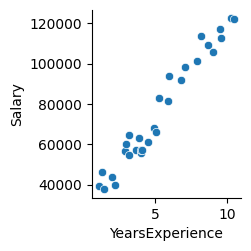

In [ ]:
sns.pairplot(y_vars = 'Salary', x_vars= 'YearsExperience', data = data)

In [ ]:
#checking( the correlation of the data
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
X = data['YearsExperience']
y = data['Salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(20,)

In [ ]:
X_test.shape

(10,)

In [ ]:
#Model Building
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.45e-13
Time:                        08:32:48   Log-Likelihood:                -200.48
No. Observations:                  20   AIC:                             405.0
Df Residuals:                      18   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.532e+04   2743.538      9.231      0.000    1.96e+04    3.11e+04
YearsExperience  9426.0388    482.706     19.527      0.000    8411.911    1.04e+04
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.819
Skew:                           0.380   Prob(JB):                        0.664
Kurtosis:                       2.363   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.45e-13
Time:                        08:32:49   Log-Likelihood:                -200.48
No. Observations:                  20   AIC:                             405.0
Df Residuals:                      18   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.532e+04   2743.538     

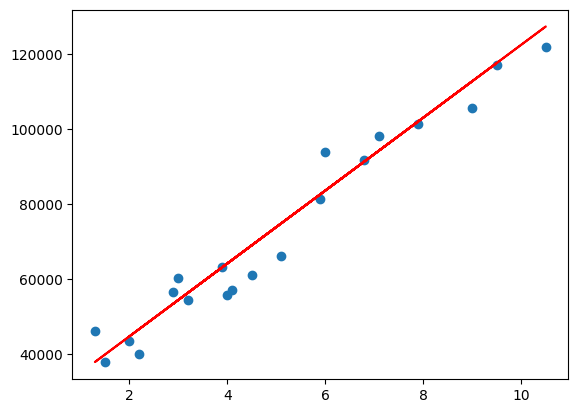

In [ ]:
#let us show the line fitting:
plt.scatter(X_train, y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_sm)

In [ ]:
y_train_pred.head()

,0
4,46061.620671
16,73397.133102
5,52659.847810
13,63971.094332
11,63028.490456


In [ ]:
residual = (y_train - y_train_pred)

In [ ]:
residual.head()

,0
4,-6170.620671
16,-7368.133102
5,3982.152190
13,-6890.094332
11,-7234.490456


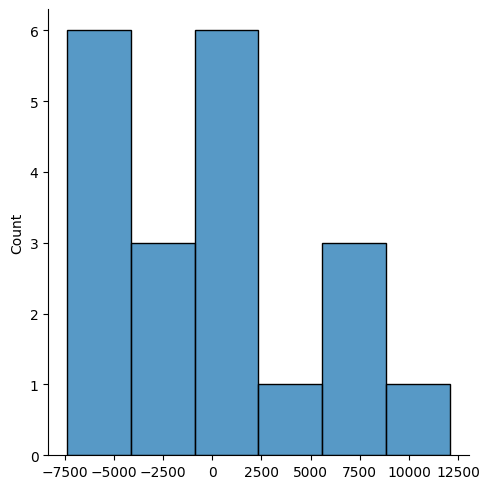

In [ ]:
sns.displot(residual)

<Axes: xlabel='YearsExperience', ylabel='None'>

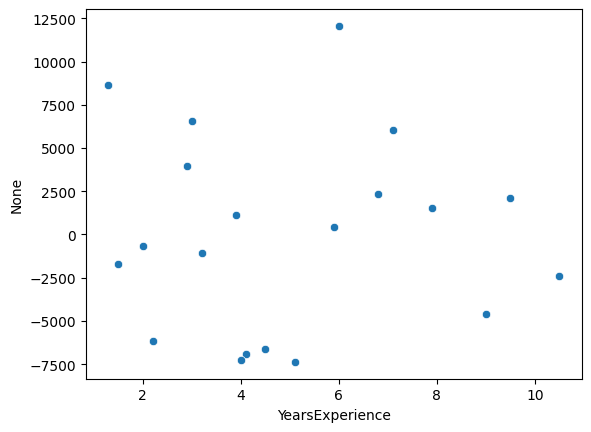

In [ ]:
sns.scatterplot(x= X_train, y=residual)

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test_sm)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

np.float64(5941.540110706561)

In [ ]:
r2_score(y_test, y_pred)

0.9553063138044948

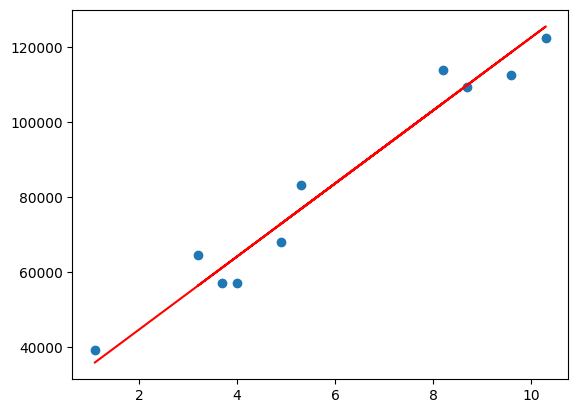

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 25200 + X_test * 9731.2038,'r')
plt.show()